In [3]:
print(df.columns.tolist())

['matchID', 'matchNo', 'match', 'currentInning', 'inningID', 'over', 'runningOver', 'runs', 'batsmanRuns', 'batsmanBall', 'bowlerRuns', 'shortText', 'batsmanPlayerID', 'batsmanName', 'bowlerPlayerID', 'bowlerName', 'isBoundary', 'isWide', 'isNoBall', 'isLegBye', 'isBye', 'isWicket', 'isBowlerWicket', 'wicketText', 'wktBatsmanName', 'wktBowlerName', 'wktBatsmanRuns', 'wktbatsmanBalls', 'commentary']


In [10]:
import pandas as pd
from collections import Counter

# Load dataset
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")

# Filter relevant columns
commentary_df = df[['over', 'bowlerName', 'commentary']].dropna()

# Convert 'over' column to numeric
commentary_df['over_num'] = commentary_df['over'].astype(str).str.extract(r'(\d+)').astype(float)

# Filter for death overs (overs >= 16)
death_overs = commentary_df[commentary_df['over_num'] >= 16]

# Most frequent bowlers in death overs
death_bowler_counts = death_overs['bowlerName'].value_counts().reset_index()
death_bowler_counts.columns = ['Bowler', 'Balls_Bowled_in_Death_Overs']

# Top 5 bowlers
top_death_bowlers = death_bowler_counts.head(5)

print("Top Death Over Bowlers (T20 WC 2024):\n")
print(top_death_bowlers.to_string(index=False))



Top Death Over Bowlers (T20 WC 2024):

           Bowler  Balls_Bowled_in_Death_Overs
   Arshdeep Singh                           54
Mustafizur Rahman                           53
    Kagiso Rabada                           53
 Ottneil Baartman                           49
   Jasprit Bumrah                           46


In [7]:
import pandas as pd
import streamlit as st

# Load dataset
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")

# Filter relevant columns
commentary_df = df[['over', 'bowlerName', 'commentary']].dropna()

# Convert 'over' column to numeric (extract over number like 16.4 → 16)
commentary_df['over_num'] = commentary_df['over'].astype(str).str.extract(r'(\d+)').astype(float)

# Filter for death overs (overs 16 to 20)
death_overs = commentary_df[commentary_df['over_num'] >= 16]

# Count overs and balls bowled in death per bowler
death_bowler_stats = (
    death_overs.groupby('bowlerName')
    .agg(
        Overs_Bowled=('over', 'nunique'),
        Balls_Bowled=('commentary', 'count')
    )
    .reset_index()
    .sort_values(by='Balls_Bowled', ascending=False)
)

def get_top_death_bowlers(n=5):
    return death_bowler_stats.head(n)

# ---------------- Streamlit App ----------------

st.set_page_config(page_title="Death Over Bowler Predictor", layout="centered")
st.title("🏏 Death Over Bowler Predictor (T20 WC 2024)")

st.markdown(
    """
    This tool analyzes the **commentary data** from the T20 World Cup 2024 to identify bowlers who bowled the most in **death overs (Overs 16-20)**.
    """
)

st.subheader("📊 Top Death Over Bowlers")
top_n = st.slider("Select number of top bowlers to show:", min_value=3, max_value=10, value=5)
top_bowlers = get_top_death_bowlers(top_n)

st.dataframe(top_bowlers.rename(columns={"bowlerName": "Bowler"}), use_container_width=True)

st.subheader("📝 Sample Commentary Snippets")
selected_bowler = st.selectbox("Choose a bowler to view death over commentary:", top_bowlers['bowlerName'])
bowler_comments = death_overs[death_overs['bowlerName'] == selected_bowler][['over', 'commentary']]

st.write(f"Showing {len(bowler_comments)} commentary entries for **{selected_bowler}** in death overs.")
st.dataframe(bowler_comments.reset_index(drop=True), use_container_width=True)


2025-07-09 09:17:54.902 
  command:

    streamlit run C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [7]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Optional: download stopwords
nltk.download('stopwords')

# Load data
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")
df = df[['over', 'bowlerName', 'commentary']].dropna()
df['over_num'] = df['over'].astype(str).str.extract(r'(\d+)').astype(float)

# Filter for death overs
death_df = df[df['over_num'] >= 16]

# Combine all commentary into one string
all_text = " ".join(death_df['commentary'].tolist()).lower()

# Remove punctuation and numbers
clean_text = re.sub(r'[^a-z\s]', '', all_text)

# Tokenize and remove stopwords
tokens = clean_text.split()
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

# Count frequencies
token_counts = Counter(filtered_tokens)
common_terms = token_counts.most_common(30)

# Display top terms
print("Top Death Over Terms in Commentary:")
for word, count in common_terms:
    print(f"{word}: {count}")

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate_from_frequencies(token_counts)

# Show plot
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Death Over Commentary Word Cloud (T20 WC 2024)', fontsize=16)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Death Over Terms in Commentary:
ball: 679
length: 560
outside: 518
leg: 483
full: 454
back: 399
deep: 315
wide: 245
short: 243
towards: 196
away: 194
across: 182
gets: 181
bat: 167
cover: 165
side: 154
midwicket: 154
point: 153
slower: 152
middle: 145
one: 143
stump: 139
line: 137
stumps: 135
square: 133
edge: 128
yorker: 127
another: 123
goes: 121
well: 117


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4408\715452624.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [9]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load and filter data
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")
df = df[['over', 'bowlerName', 'commentary']].dropna()
df['over_num'] = df['over'].astype(str).str.extract(r'(\d+)').astype(float)
death_df = df[df['over_num'] >= 16].copy()

# Define delivery types to search for
delivery_terms = ['yorker', 'slower', 'bouncer', 'full toss', 'length ball', 'good length', 'short ball', 'wide yorker', 'off cutter', 'leg cutter', 'tight over']

# Initialize dictionary to hold results
bowler_patterns = {}

# Normalize commentary text
death_df['commentary_clean'] = death_df['commentary'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Count delivery term occurrences per bowler
for bowler in death_df['bowlerName'].unique():
    bowler_data = death_df[death_df['bowlerName'] == bowler]
    commentary = " ".join(bowler_data['commentary_clean'].tolist())
    bowler_patterns[bowler] = {term: commentary.count(term) for term in delivery_terms}

# Convert to DataFrame for analysis
pattern_df = pd.DataFrame.from_dict(bowler_patterns, orient='index').fillna(0).astype(int)
top_bowlers = pattern_df.sum(axis=1).sort_values(ascending=False).head(10).index
top_bowler_df = pattern_df.loc[top_bowlers]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(top_bowler_df, annot=True, fmt='d', cmap='viridis')
plt.title('Delivery Types Used in Death Overs by Top Bowlers (T20 WC 2024)', fontsize=16)
plt.xlabel("Delivery Type")
plt.ylabel("Bowler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\1973313417.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [8]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load and filter data
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")
df = df[['over', 'bowlerName', 'commentary']].dropna()
df['over_num'] = df['over'].astype(str).str.extract(r'(\d+)').astype(float)
death_df = df[df['over_num'] >= 16].copy()

# Define delivery types to search for
delivery_terms = ['yorker', 'slower', 'bouncer', 'full toss', 'length ball', 'good length', 'short ball', 'wide yorker', 'off cutter', 'leg cutter', 'tight over']

# Initialize dictionary to hold results
bowler_patterns = {}

# Normalize commentary text
death_df['commentary_clean'] = death_df['commentary'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Count delivery term occurrences per bowler
for bowler in death_df['bowlerName'].unique():
    bowler_data = death_df[death_df['bowlerName'] == bowler]
    commentary = " ".join(bowler_data['commentary_clean'].tolist())
    bowler_patterns[bowler] = {term: commentary.count(term) for term in delivery_terms}

# Convert to DataFrame for analysis
pattern_df = pd.DataFrame.from_dict(bowler_patterns, orient='index').fillna(0).astype(int)
top_bowlers = pattern_df.sum(axis=1).sort_values(ascending=False).head(10).index
top_bowler_df = pattern_df.loc[top_bowlers]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(top_bowler_df, annot=True, fmt='d', cmap='viridis')
plt.title('Delivery Types Used in Death Overs by Top Bowlers (T20 WC 2024)', fontsize=16)
plt.xlabel("Delivery Type")
plt.ylabel("Bowler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4408\1973313417.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [9]:
import streamlit as st

st.pyplot(plt.gcf())  # Streamlit renders current matplotlib figure


2025-05-18 14:11:04.172 
  command:

    streamlit run C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

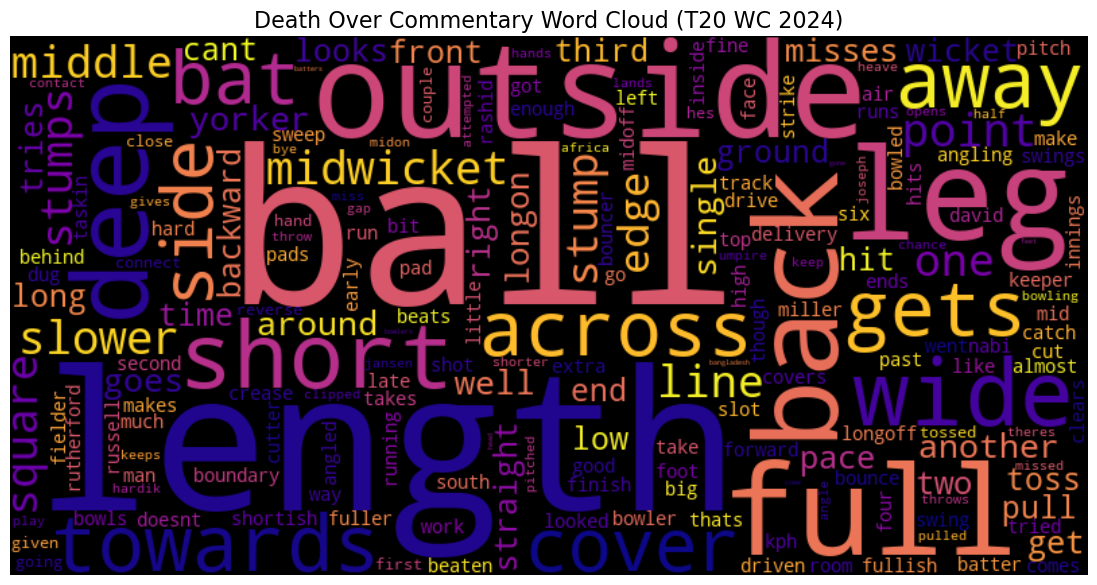

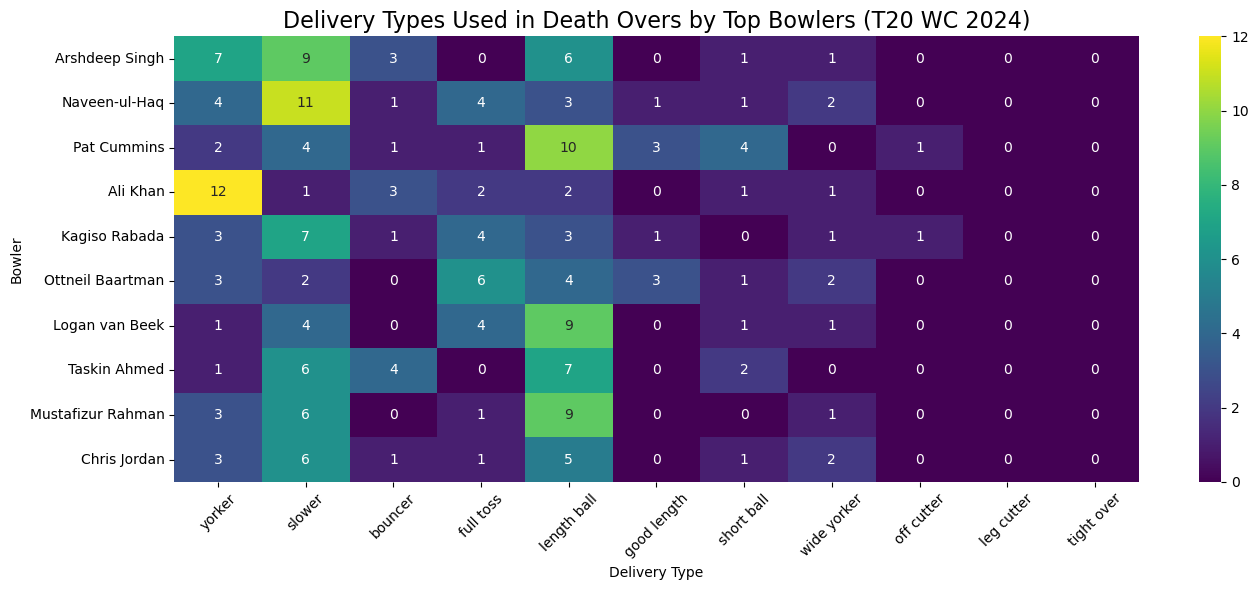

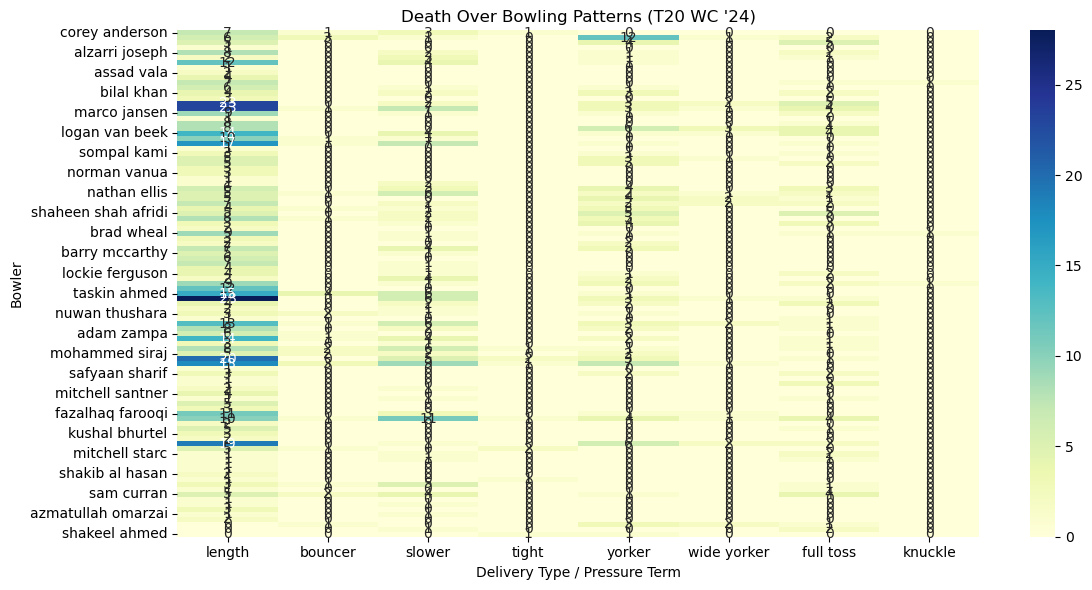

In [13]:
# 📌 1. Enable inline plotting for Jupyter
%matplotlib inline

# 📌 2. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# 📌 3. Load the dataset
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")

# 📌 4. Filter and clean commentary data
commentary_df = df[['over', 'bowlerName', 'commentary']].dropna()
commentary_df['over_num'] = commentary_df['over'].astype(str).str.extract(r'(\d+)').astype(float)

# 📌 5. Filter for death overs (16-20)
death_overs = commentary_df[commentary_df['over_num'] >= 16]

# 📌 6. Define pressure-delivery terms to search
key_terms = ['yorker', 'bouncer', 'slower', 'wide yorker', 'tight', 'full toss', 'length', 'knuckle']

# 📌 7. Create a bowler-term frequency matrix
bowler_term_matrix = {}

for _, row in death_overs.iterrows():
    bowler = row['bowlerName'].strip().lower()
    comment = str(row['commentary']).lower()

    if bowler not in bowler_term_matrix:
        bowler_term_matrix[bowler] = Counter()

    for term in key_terms:
        if term in comment:
            bowler_term_matrix[bowler][term] += 1

# 📌 8. Convert to DataFrame for heatmap
bowler_term_df = pd.DataFrame.from_dict(bowler_term_matrix, orient='index').fillna(0)

# 📌 9. Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(bowler_term_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Death Over Bowling Patterns (T20 WC '24)")
plt.xlabel("Delivery Type / Pressure Term")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Load data
df = pd.read_excel("T20_WC_24_All_Matches_Dataset.xlsx")

# Filter only relevant columns
df = df[['over', 'bowlerName', 'runs', 'isWicket', 'isWide', 'isNoBall']].dropna()
df['over_num'] = df['over'].astype(str).str.extract(r'(\d+)').astype(float)

# Filter death overs (>=16)
death_df = df[df['over_num'] >= 16].copy()

# Group by bowler
summary = death_df.groupby('bowlerName').agg(
    total_runs=('runs', 'sum'),
    total_balls=('over', 'count'),
    wickets=('isWicket', 'sum'),
    wides=('isWide', 'sum'),
    no_balls=('isNoBall', 'sum')
).reset_index()

# Calculate economy rate (runs per 6 balls)
summary['economy'] = summary['total_runs'] / (summary['total_balls'] / 6)

# Death over performance score: weighted formula (lower is better)
summary['performance_score'] = (
    summary['economy'] * 1.5 +
    (summary['wides'] + summary['no_balls']) * 2 -
    summary['wickets'] * 2
)

# Sort by best performance
best_bowlers = summary.sort_values(by='performance_score').reset_index(drop=True)

# Display top 5
print("🏆 Top Death-Over Bowlers (Based on Composite Score):")
print(best_bowlers[['bowlerName', 'economy', 'wickets', 'wides', 'no_balls', 'performance_score']].head())


🏆 Top Death-Over Bowlers (Based on Composite Score):
        bowlerName   economy  wickets  wides  no_balls  performance_score
0      Trent Boult  3.000000        5      0         0          -5.500000
1  Shakib Al Hasan  0.000000        2      0         0          -4.000000
2   Jasprit Bumrah  4.173913        5      0         0          -3.739130
3     Chris Jordan  8.432432       10      2         0          -3.351351
4      Pat Cummins  6.558140        7      1         0          -2.162791


In [21]:
death_df = df[df['over_num'] >= 16].copy()


In [23]:
death_df

,over,bowlerName,runs,isWicket,isWide,isNoBall,over_num
96,16.1,Corey Anderson,1,False,False,False,16.0
97,16.2,Corey Anderson,0,False,False,False,16.0
98,16.3,Corey Anderson,1,False,False,False,16.0
99,16.4,Corey Anderson,2,False,False,False,16.0
100,16.5,Corey Anderson,0,False,False,False,16.0
...,...,...,...,...,...,...,...
11438,19.3,Hardik Pandya,1,False,False,False,19.0
11439,19.4,Hardik Pandya,1,False,False,False,19.0
11440,19.5,Hardik Pandya,1,False,True,False,19.0
11441,19.5,Hardik Pandya,0,True,False,False,19.0


In [25]:
death_df = df[df['over_num'].between(16, 20, inclusive='both')].copy()


In [27]:
death_df

,over,bowlerName,runs,isWicket,isWide,isNoBall,over_num
96,16.1,Corey Anderson,1,False,False,False,16.0
97,16.2,Corey Anderson,0,False,False,False,16.0
98,16.3,Corey Anderson,1,False,False,False,16.0
99,16.4,Corey Anderson,2,False,False,False,16.0
100,16.5,Corey Anderson,0,False,False,False,16.0
...,...,...,...,...,...,...,...
11438,19.3,Hardik Pandya,1,False,False,False,19.0
11439,19.4,Hardik Pandya,1,False,False,False,19.0
11440,19.5,Hardik Pandya,1,False,True,False,19.0
11441,19.5,Hardik Pandya,0,True,False,False,19.0


In [13]:
import pandas as pd
import random

# Sample bowlers
bowlers = [
    "Jasprit Bumrah", "Mitchell Starc", "Pat Cummins", "Bhuvneshwar Kumar",
    "Trent Boult", "Lasith Malinga", "Chris Jordan", "Kagiso Rabada",
    "Shaun Tait", "Dale Steyn", "Andrew Tye", "Jofra Archer"
]

# Generate random data
data = []
for bowler in bowlers:
    death_over_economy = round(random.uniform(7.0, 9.5), 1)  # Runs per over
    death_over_strike_rate = random.randint(10, 20)  # Balls per wicket
    yorker_accuracy = random.randint(60, 90)  # Success percentage
    slower_ball_effectiveness = random.randint(50, 80)  # Success percentage
    pressure_performance = random.randint(70, 95)  # Performance rating
    wickets_death_overs = random.randint(5, 20)  # Wickets taken
    suitable_for_death_overs = 1 if death_over_economy < 8.5 and yorker_accuracy > 75 else 0  # Target variable

    data.append([
        bowler, death_over_economy, death_over_strike_rate, yorker_accuracy,
        slower_ball_effectiveness, pressure_performance, wickets_death_overs, suitable_for_death_overs
    ])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "bowler", "death_over_economy", "death_over_strike_rate", "yorker_accuracy",
    "slower_ball_effectiveness", "pressure_performance", "wickets_death_overs", "suitable_for_death_overs"
])

# Save to CSV
df.to_csv("bowler_performance.csv", index=False)

print("Dataset saved as bowler_performance.csv")
1

Dataset saved as bowler_performance.csv


1

In [15]:
df_per=pd.read_csv("bowler_performance.csv")

In [17]:
df_per

,bowler,death_over_economy,death_over_strike_rate,yorker_accuracy,slower_ball_effectiveness,pressure_performance,wickets_death_overs,suitable_for_death_overs
0,Jasprit Bumrah,8.9,12,69,50,73,15,0
1,Mitchell Starc,7.1,15,69,68,76,20,0
2,Pat Cummins,7.6,16,65,68,74,20,0
3,Bhuvneshwar Kumar,7.9,15,68,59,89,7,0
4,Trent Boult,9.3,13,90,80,95,9,0
5,Lasith Malinga,8.1,11,74,56,74,17,0
6,Chris Jordan,8.5,17,83,59,94,20,0
7,Kagiso Rabada,7.0,17,81,73,76,17,1
8,Shaun Tait,8.4,10,62,52,83,10,0
9,Dale Steyn,9.0,13,80,80,91,15,0
